# CLUSTERING AND RECOMMENDATION SYSTEM

### Importing Necessary Libraries

In [90]:
"""
This script has the following libraries imported: pandas, numpy, matplotlib, seaborn,scikit-learn.
"""

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS

import nltk
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
wordnet  = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
#Reading the excel file present in the device
netflix_titles = pd.read_excel("netflix_titles.xlsx")
netflix_titles

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0
...,...,...,...,...,...,...,...,...,...
6231,NaN,13,TV Show,Red vs. Blue,NaN,2015.0,NR,"This parody of first-person shooter games, mil...",80000063.0
6232,NaN,4,TV Show,Maron,NaN,2016.0,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564.0
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0


In [92]:
#converting the float type data to int type data and filling null values 
netflix_titles['release_year'] = netflix_titles['release_year'].fillna(0).astype(int)
netflix_titles['show_id'] = netflix_titles['show_id'].fillna(0).astype(int)
netflix_titles

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979
...,...,...,...,...,...,...,...,...,...
6231,NaN,13,TV Show,Red vs. Blue,NaN,2015,NR,"This parody of first-person shooter games, mil...",80000063
6232,NaN,4,TV Show,Maron,NaN,2016,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016,NaN,Nursery rhymes and original music for children...,80116008
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,"Set during the Russian Revolution, this comic ...",70281022


In [93]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   duration_minutes  4267 non-null   object
 1   duration_seasons  1971 non-null   object
 2   type              6235 non-null   object
 3   title             6235 non-null   object
 4   date_added        6223 non-null   object
 5   release_year      6236 non-null   int32 
 6   rating            6223 non-null   object
 7   description       6233 non-null   object
 8   show_id           6236 non-null   int32 
dtypes: int32(2), object(7)
memory usage: 389.9+ KB


In [94]:
netflix_titles.isna().sum()

duration_minutes    1969
duration_seasons    4265
type                   1
title                  1
date_added            13
release_year           0
rating                13
description            3
show_id                0
dtype: int64

In [95]:
#Dropping Duration minutes and Duration Season Coloum 
netflix_titles.drop(columns=["duration_minutes","duration_seasons"],inplace=True, axis = 1)

In [96]:
netflix_titles

,type,title,date_added,release_year,rating,description,show_id
0,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628
1,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401
2,TV Show,Transformers Prime,2018-09-08 00:00:00,2013,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439
3,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654
4,Movie,#realityhigh,2017-09-08 00:00:00,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979
...,...,...,...,...,...,...,...
6231,TV Show,Red vs. Blue,NaN,2015,NR,"This parody of first-person shooter games, mil...",80000063
6232,TV Show,Maron,NaN,2016,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564
6233,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016,NaN,Nursery rhymes and original music for children...,80116008
6234,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,"Set during the Russian Revolution, this comic ...",70281022


In [97]:
netflix_titles.duplicated().sum()

0

In [98]:
#Reading the sheets present inside the excel file
netflix_titles_directors = pd.read_excel("netflix_titles.xlsx", sheet_name='netflix_titles_directors')
netflix_titles_directors

,director,show_id
0,Richard Finn,81145628
1,Fernando Lebrija,80125979
2,Gabe Ibáñez,70304989
3,Rodrigo Toro,80164077
4,Henrik Ruben Genz,70304990
...,...,...
4847,Dennis Widmyer,80096585
4848,Raja Sen,80108386
4849,Drue Metz,80213400
4850,Abdullah Al Noor,81048551


In [99]:
netflix_titles_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  4852 non-null   object
 1   show_id   4852 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.9+ KB


In [100]:
netflix_titles_directors.isna().sum()

director    0
show_id     0
dtype: int64

In [101]:
netflix_titles_directors.duplicated().sum()

1

In [102]:
netflix_titles_directors.drop_duplicates(inplace=True)
netflix_titles_directors

,director,show_id
0,Richard Finn,81145628
1,Fernando Lebrija,80125979
2,Gabe Ibáñez,70304989
3,Rodrigo Toro,80164077
4,Henrik Ruben Genz,70304990
...,...,...
4847,Dennis Widmyer,80096585
4848,Raja Sen,80108386
4849,Drue Metz,80213400
4850,Abdullah Al Noor,81048551


In [103]:
agg_func_director = {'director': ', '.join}
netflix_titles_directors = netflix_titles_directors.groupby('show_id').agg(agg_func_director).reset_index()

In [104]:
netflix_titles_directors

,show_id,director
0,247747,Manmohan Desai
1,269880,Michael Bay
2,281550,Luis Valdez
3,284890,Rajkumar Santoshi
4,292118,Mike Judge
...,...,...
4260,81221913,Remy Kohli
4261,81221914,Raman Kumar
4262,81227195,Mandla Dube
4263,81228864,Andrew Wessels


In [105]:
netflix_titles_countries = pd.read_excel("netflix_titles.xlsx", sheet_name='netflix_titles_countries')
netflix_titles_countries

,country,show_id
0,Germany,80016401
1,South Africa,80182274
2,United States,80182274
3,United States,81145628
4,United Kingdom,80117401
...,...,...
7174,United States,70285728
7175,New Zealand,80182274
7176,Uruguay,80182274
7177,United States,80016401


In [106]:
netflix_titles_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7179 entries, 0 to 7178
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  7179 non-null   object
 1   show_id  7179 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.3+ KB


In [107]:
netflix_titles_countries.isna().sum()

country    0
show_id    0
dtype: int64

In [108]:
netflix_titles_countries.duplicated().sum()

0

In [109]:
netflix_titles_countries

,country,show_id
0,Germany,80016401
1,South Africa,80182274
2,United States,80182274
3,United States,81145628
4,United Kingdom,80117401
...,...,...
7174,United States,70285728
7175,New Zealand,80182274
7176,Uruguay,80182274
7177,United States,80016401


In [110]:
agg_func_country = {'country': ', '.join}
netflix_titles_countries = netflix_titles_countries.groupby('show_id').agg(agg_func_country).reset_index()

In [111]:
netflix_titles_cast = pd.read_excel("netflix_titles.xlsx", sheet_name='netflix_titles_cast')
netflix_titles_cast

,cast,show_id
0,Alan Marriott,81145628
1,Jandino Asporaat,80117401
2,Peter Cullen,70234439
3,Will Friedle,80058654
4,Nesta Cooper,80125979
...,...,...
44306,Kaden Stephen,80108373
44307,Tonye Patano,70136122
44308,Rie Nakagawa,70204989
44309,Yomary Cruz,80000063


In [112]:
netflix_titles_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44311 entries, 0 to 44310
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cast     44311 non-null  object
 1   show_id  44311 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 692.5+ KB


In [113]:
netflix_titles_cast.isna().sum()

cast       0
show_id    0
dtype: int64

In [114]:
netflix_titles_cast.duplicated().sum()

1

In [115]:
netflix_titles_cast.drop_duplicates(inplace=True)
netflix_titles_cast

,cast,show_id
0,Alan Marriott,81145628
1,Jandino Asporaat,80117401
2,Peter Cullen,70234439
3,Will Friedle,80058654
4,Nesta Cooper,80125979
...,...,...
44306,Kaden Stephen,80108373
44307,Tonye Patano,70136122
44308,Rie Nakagawa,70204989
44309,Yomary Cruz,80000063


In [116]:
agg_func_cast = {'cast': ', '.join}
netflix_titles_cast = netflix_titles_cast.groupby('show_id').agg(agg_func_cast).reset_index()

In [117]:
netflix_titles_cast

,show_id,cast
0,247747,"Vinod Khanna, Parveen Babi, Nirupa Roy, Shaban..."
1,269880,"Will Smith, Theresa Randle, Emmanuel Xuereb, J..."
2,281550,"Lou Diamond Phillips, Danielle von Zerneck, Ri..."
3,284890,"Twinkle Khanna, Ashwin Kaushal, Harish Patel, ..."
4,292118,"Mike Judge, Robert Stack, Pamela Blair, Jacque..."
...,...,...
5659,81224868,"Bill Rogers, Mark Szabo, Mike Pollock, Daniel ..."
5660,81227195,"Thabo Rametsi, Louw Venter, Pearl Thusi, Thabo..."
5661,81228864,"Joey Rasdien, Santhiran Moonsamy, Kaseran Pill..."
5662,81235603,"Tara Strong, Tim Russ, Kari Wahlgren, Don Lesl..."


In [118]:
netflix_titles_category = pd.read_excel("netflix_titles.xlsx", sheet_name='netflix_titles_category')
netflix_titles_category

,listed_in,show_id
0,Children & Family Movies,81145628
1,Stand-Up Comedy,80117401
2,Kids' TV,70234439
3,Kids' TV,80058654
4,Comedies,80125979
...,...,...
13665,TV Action & Adventure,80126877
13666,TV Comedies,80126599
13667,TV Comedies,70243132
13668,TV Sci-Fi & Fantasy,80000063


In [119]:
netflix_titles_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13670 entries, 0 to 13669
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   listed_in  13670 non-null  object
 1   show_id    13670 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 213.7+ KB


In [120]:
netflix_titles_category.isna().sum()

listed_in    0
show_id      0
dtype: int64

In [121]:
netflix_titles_category.duplicated().sum()

0

In [122]:
netflix_titles_category

,listed_in,show_id
0,Children & Family Movies,81145628
1,Stand-Up Comedy,80117401
2,Kids' TV,70234439
3,Kids' TV,80058654
4,Comedies,80125979
...,...,...
13665,TV Action & Adventure,80126877
13666,TV Comedies,80126599
13667,TV Comedies,70243132
13668,TV Sci-Fi & Fantasy,80000063


In [123]:
agg_func_category = {'listed_in': ', '.join}
netflix_titles_category = netflix_titles_category.groupby('show_id').agg(agg_func_category).reset_index()

In [124]:
netflix_titles_category

,show_id,listed_in
0,247747,"Action & Adventure, Classic Movies, Comedies"
1,269880,"Action & Adventure, Comedies"
2,281550,"Classic Movies, Dramas, Music & Musicals"
3,284890,"Action & Adventure, International Movies, Musi..."
4,292118,"Comedies, Cult Movies"
...,...,...
6229,81224868,"Kids' TV, Korean TV Shows"
6230,81227195,"Dramas, International Movies"
6231,81228864,"Action & Adventure, Comedies, International Mo..."
6232,81235603,Kids' TV


In [125]:
# List of DataFrames
dataframes_list = [netflix_titles_directors, netflix_titles_countries,
                   netflix_titles_cast, netflix_titles_category]
merged_df = netflix_titles.copy()

# Merge each DataFrame in the list on 'show_id' column and append to merged_df
for df in dataframes_list:
    merged_df = merged_df.merge(df, on='show_id', how='left')
merged_df

,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401,NaN,United Kingdom,Jandino Asporaat,Stand-Up Comedy
2,TV Show,Transformers Prime,2018-09-08 00:00:00,2013,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439,NaN,United States,"Peter Cullen, Kevin Michael Richardson, Josh K...",Kids' TV
3,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654,NaN,United States,"Will Friedle, Mitchell Whitfield, Ted McGinley...",Kids' TV
4,Movie,#realityhigh,2017-09-08 00:00:00,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies
...,...,...,...,...,...,...,...,...,...,...,...
6231,TV Show,Red vs. Blue,NaN,2015,NR,"This parody of first-person shooter games, mil...",80000063,NaN,United States,"Burnie Burns, Joel Heyman, Dan Godwin, Matt Hu...","TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6232,TV Show,Maron,NaN,2016,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564,NaN,United States,"Marc Maron, Andy Kindler, Judd Hirsch, Josh Br...",TV Comedies
6233,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016,NaN,Nursery rhymes and original music for children...,80116008,NaN,NaN,NaN,Movies
6234,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,"Set during the Russian Revolution, this comic ...",70281022,NaN,United Kingdom,"Daniel Radcliffe, Rosie Cavaliero, Margaret Cl...","British TV Shows, TV Comedies, TV Dramas"


In [126]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6235 non-null   object
 1   title         6235 non-null   object
 2   date_added    6223 non-null   object
 3   release_year  6236 non-null   int32 
 4   rating        6223 non-null   object
 5   description   6233 non-null   object
 6   show_id       6236 non-null   int32 
 7   director      4263 non-null   object
 8   country       5756 non-null   object
 9   cast          5663 non-null   object
 10  listed_in     6232 non-null   object
dtypes: int32(2), object(9)
memory usage: 487.3+ KB


In [127]:
merged_df.duplicated().sum()

0

In [128]:
merged_df.isna().sum()

type               1
title              1
date_added        13
release_year       0
rating            13
description        3
show_id            0
director        1973
country          480
cast             573
listed_in          4
dtype: int64

In [129]:
merged_df.dropna(inplace=True)

In [130]:
# Converting the date_added column to datetime format 
merged_df['date_added'] = pd.to_datetime(merged_df['date_added'])
merged_df['date_added'] = merged_df['date_added'].dt.date

In [131]:
merged_df

,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies"
4,Movie,#realityhigh,2017-09-08,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies
6,Movie,Automata,2017-09-08,2014,R,"In a dystopian future, an insurance adjuster f...",70304989,Gabe Ibáñez,"Bulgaria, Canada, United States, Spain","Antonio Banderas, Robert Forster, Tim McInnern...","International Movies, Sci-Fi & Fantasy, Thrillers"
7,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017,TV-MA,Fabrizio Copano takes audience participation t...,80164077,"Rodrigo Toro, Francisco Schultz",Chile,Fabrizio Copano,Stand-Up Comedy
9,Movie,Good People,2017-09-08,2014,R,A struggling couple can't believe their luck w...,70304990,Henrik Ruben Genz,"United States, Sweden, United Kingdom, Denmark","James Franco, Sam Spruell, Thomas Arnold, Anna...","Action & Adventure, Thrillers"
...,...,...,...,...,...,...,...,...,...,...,...
6144,TV Show,The Great British Baking Show,2019-08-30,2019,TV-PG,A talented batch of amateur bakers face off in...,80063224,Andy Devonshire,United Kingdom,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV"
6160,TV Show,Miraculous: Tales of Ladybug & Cat Noir,2019-08-02,2018,TV-Y7,"When Paris is in peril, Marinette becomes Lady...",80164216,Thomas Astruc,"France, South Korea, Japan","Cristina Vee, Max Mittelman, Stephanie Sheh, C...","Kids' TV, TV Action & Adventure"
6169,TV Show,Sacred Games,2019-08-15,2019,TV-MA,A link in their pasts leads an honest cop to a...,80115328,"Vikramaditya Motwane, Anurag Kashyap","India, United States","Saif Ali Khan, Jitendra Joshi, Nawazuddin Sidd...","Crime TV Shows, International TV Shows, TV Dramas"
6184,TV Show,Men on a Mission,2019-04-09,2019,TV-14,Male celebs play make-believe as high schooler...,80176842,Jung-ah Im,South Korea,"Ho-dong Kang, Jang-hoon Seo, Kyung-hoon Min, H...","International TV Shows, Korean TV Shows, Stand..."


In [132]:
merged_df.columns

Index(['type', 'title', 'date_added', 'release_year', 'rating', 'description',
       'show_id', 'director', 'country', 'cast', 'listed_in'],
      dtype='object')

In [133]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3773 entries, 0 to 6215
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          3773 non-null   object
 1   title         3773 non-null   object
 2   date_added    3773 non-null   object
 3   release_year  3773 non-null   int32 
 4   rating        3773 non-null   object
 5   description   3773 non-null   object
 6   show_id       3773 non-null   int32 
 7   director      3773 non-null   object
 8   country       3773 non-null   object
 9   cast          3773 non-null   object
 10  listed_in     3773 non-null   object
dtypes: int32(2), object(9)
memory usage: 324.2+ KB


In [134]:
merged_df.describe()

,release_year,show_id
count,3773.000000,3.773000e+03
mean,2012.086668,7.510773e+07
std,9.568094,1.341267e+07
min,1942.000000,2.477470e+05
25%,2011.000000,7.027577e+07
50%,2016.000000,8.014732e+07
75%,2017.000000,8.024072e+07
max,2020.000000,8.123573e+07


## VISUALIZATION

In [135]:
#Calculate the range of years
min_year = merged_df['release_year'].min()
max_year = merged_df['release_year'].max()
print(f"The dataset contains movies released from {min_year} to {max_year}.",end="\n\n")

The dataset contains movies released from 1942 to 2020.



In [136]:
merged_df["type"].value_counts()  

type
Movie      3677
TV Show      96
Name: count, dtype: int64

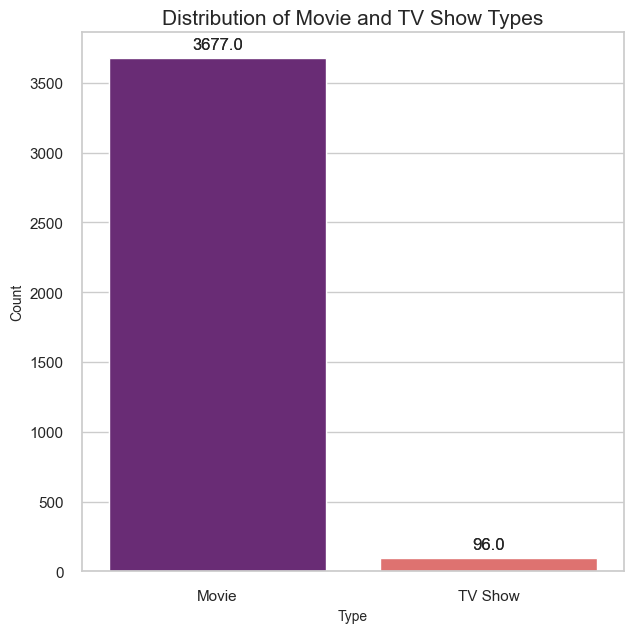

In [137]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 7))

sns.countplot(x="type", data=merged_df)
plt.title('Distribution of Movie and TV Show Types', fontsize=15)

ax = sns.countplot(data=merged_df, x='type',palette='magma')
# Adding circle annotations for each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [138]:
#Printing Count of movies released for every 5 years from 1925 to 2020
bins = list(range(1925, 2021, 5))
labels = [f"{start}-{start+4}" for start in range(1925, 2020, 5)]

# Cut the release years into bins
df['year_range'] = pd.cut(merged_df['release_year'], bins=bins, labels=labels, right=False)

# Count the number of movies in each 5-year range
movie_counts =df['year_range'].value_counts().sort_index()

# Display the counts
print("Count of movies released for every 5 years from 1925 to 2020:")
print(movie_counts)

Count of movies released for every 5 years from 1925 to 2020:
year_range
1925-1929       0
1930-1934       0
1935-1939       0
1940-1944       2
1945-1949       4
1950-1954       1
1955-1959       5
1960-1964       7
1965-1969      10
1970-1974      23
1975-1979      27
1980-1984      40
1985-1989      41
1990-1994      61
1995-1999      94
2000-2004     167
2005-2009     336
2010-2014     664
2015-2019    2285
Name: count, dtype: int64


In [139]:
merged_df['release_year'] = pd.to_numeric(merged_df['release_year'], errors='coerce').astype('Int64')
# Count the number of movies released in each year
yearly_movie_count = merged_df['release_year'].value_counts()

# Find the year with the highest count
highest_count_year = yearly_movie_count.idxmax()

# Find the year with the lowest count
lowest_count_year = yearly_movie_count.idxmin()

# Display the information
print("Number of Movies Released Each Year:",end="\n\n")
print(yearly_movie_count,end="\n\n")

print("\nYear with the Highest Number of Movies Released:", highest_count_year,end="\n\n")
print("Year with the Lowest Number of Movies Released:", lowest_count_year,end="\n\n")



Number of Movies Released Each Year:

release_year
2017    585
2018    537
2016    514
2019    326
2015    323
       ... 
1945      1
1955      1
1956      1
1970      1
1964      1
Name: count, Length: 69, dtype: Int64


Year with the Highest Number of Movies Released: 2017

Year with the Lowest Number of Movies Released: 1966



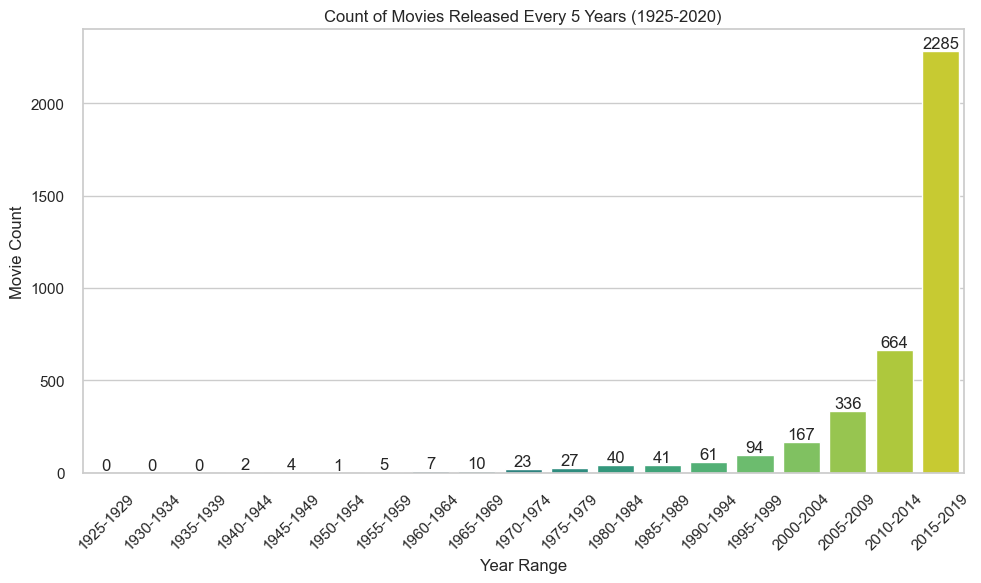

In [140]:
#Plotting Count of movies released for every 5 years from 1925 to 2020
# Create bins for every 5 years from 1925 to 2020
bins = list(range(1925, 2021, 5))
labels = [f"{start}-{start+4}" for start in range(1925, 2020, 5)]

# Cut the release years into bins
merged_df['year_range'] = pd.cut(merged_df['release_year'], bins=bins, labels=labels, right=False)

# Count the number of movies in each 5-year range
movie_counts = merged_df['year_range'].value_counts().sort_index().reset_index()
movie_counts.columns = ['Year Range', 'Movie Count']

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Year Range', y='Movie Count', data=movie_counts, palette="viridis")

# Annotate the bars with counts
for index, row in movie_counts.iterrows():
    plt.text(index, row['Movie Count'], str(row['Movie Count']), ha='center', va='bottom')

plt.title('Count of Movies Released Every 5 Years (1925-2020)')
plt.xlabel('Year Range')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

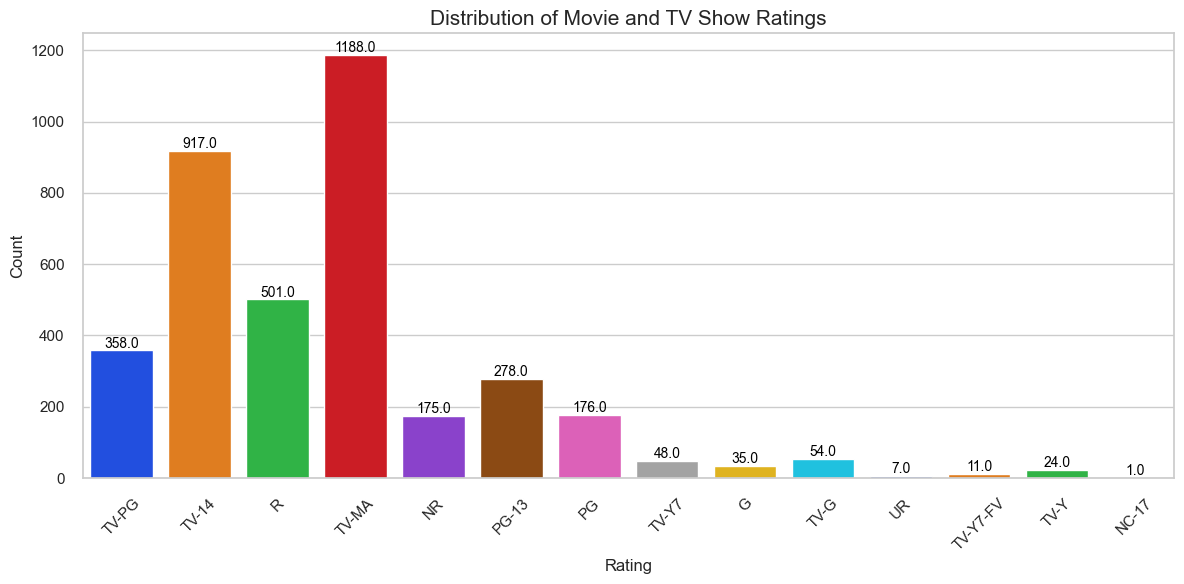

In [141]:
#Plotting Distribution of Movie and TV Show Ratings
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot the count of each rating category
ax = sns.countplot(x="rating", data=merged_df, palette="bright")

# Add annotations with the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Movie and TV Show Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [142]:
#Printing value count of each country 
country_df = merged_df['country'].str.split(',', expand=True)
country_df = country_df.stack().reset_index(level=1, drop=True)
country_counts = country_df.value_counts()
print(country_counts)

United States         1505
India                  737
United Kingdom         252
 United States         213
Canada                 114
                      ... 
 Kenya                   1
 Sudan                   1
 Sri Lanka               1
Dominican Republic       1
 Ecuador                 1
Name: count, Length: 154, dtype: int64


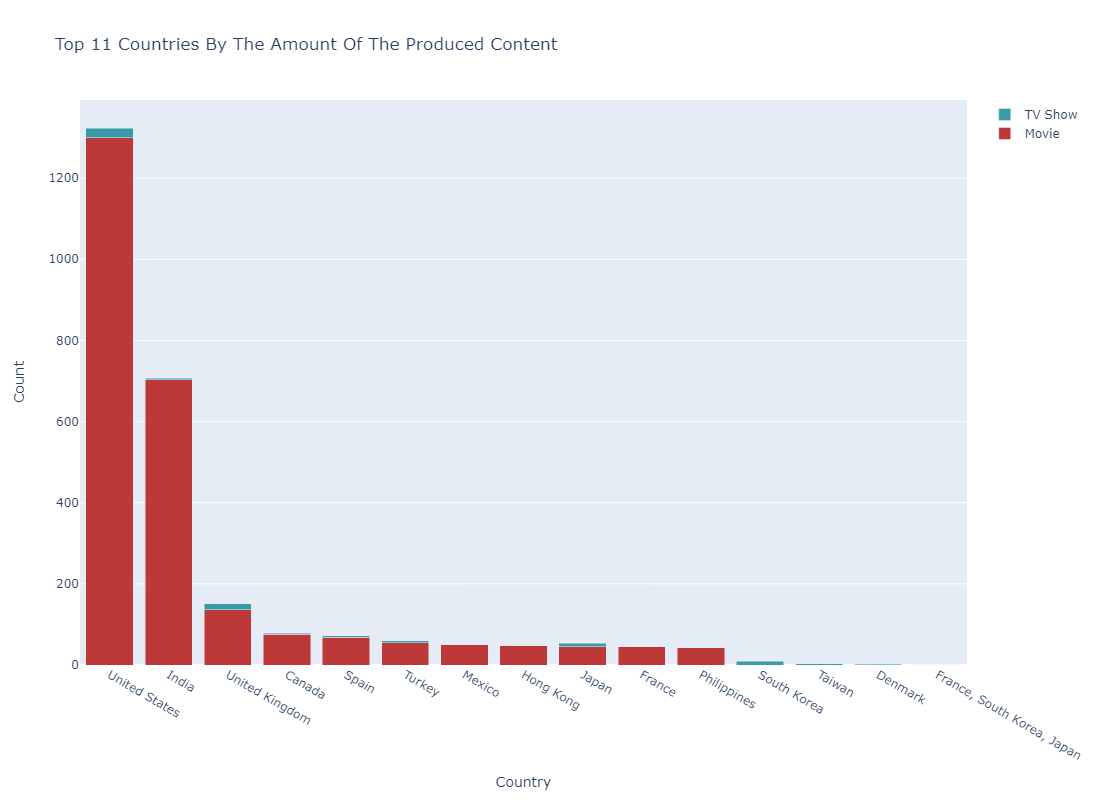

In [143]:
#Plotting Top 11 Countries By The Amount Of The Produced Content
movie_counts = merged_df[merged_df['type'] == 'Movie']['country'].value_counts()
tv_show_counts = merged_df[merged_df['type'] == 'TV Show']['country'].value_counts()

top_movie_countries = movie_counts.head(11)
top_tv_show_countries = tv_show_counts.head(11)

#Creating Traces
trace1 = go.Bar(x=top_movie_countries.index, y=top_movie_countries.values, name='Movie', marker=dict(color='#bd3939'))
trace2 = go.Bar(x=top_tv_show_countries.index, y=top_tv_show_countries.values, name='TV Show', marker=dict(color='#399ba3'))
data = [trace1, trace2]

# Layout of plot
layout = go.Layout(title='Top 11 Countries By The Amount Of The Produced Content',xaxis=dict(title='Country'), yaxis=dict(title='Count'),
                   barmode='stack', width=1000,  
                   height=800)  

fig = go.Figure(data=data, layout=layout)
fig.show()

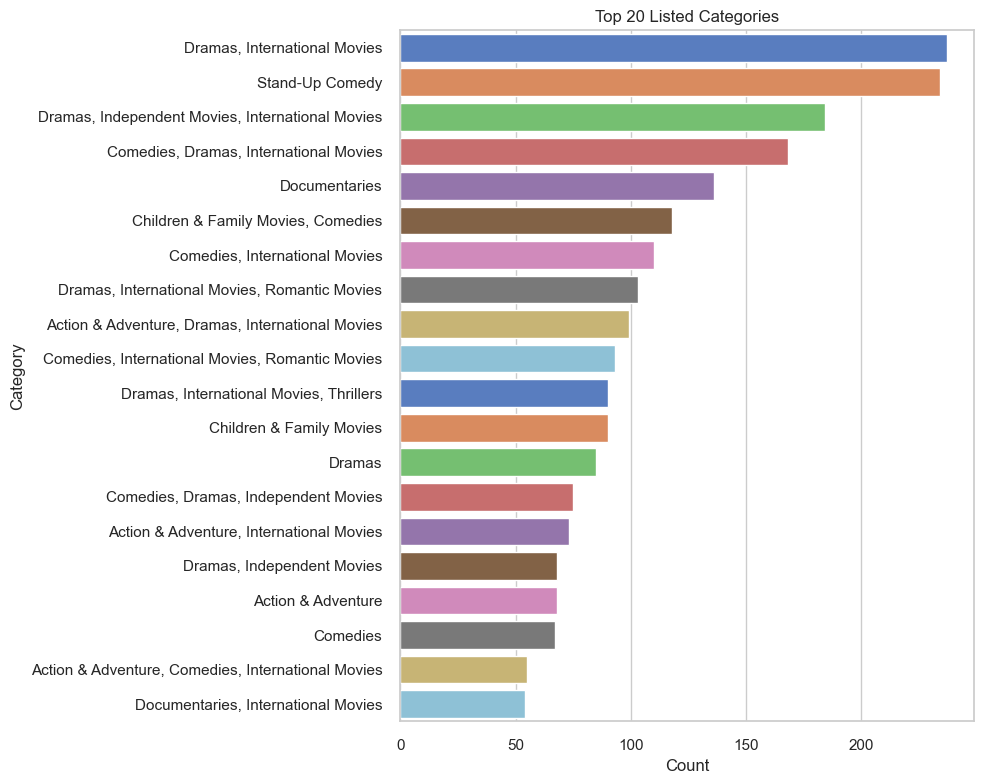

In [144]:
# Count occurrences of each category in listed_in
category_counts = merged_df['listed_in'].value_counts().head(20).reset_index()
category_counts.columns = ['listed_in', 'Count']
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='listed_in', data=category_counts, palette='muted')
plt.title('Top 20 Listed Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

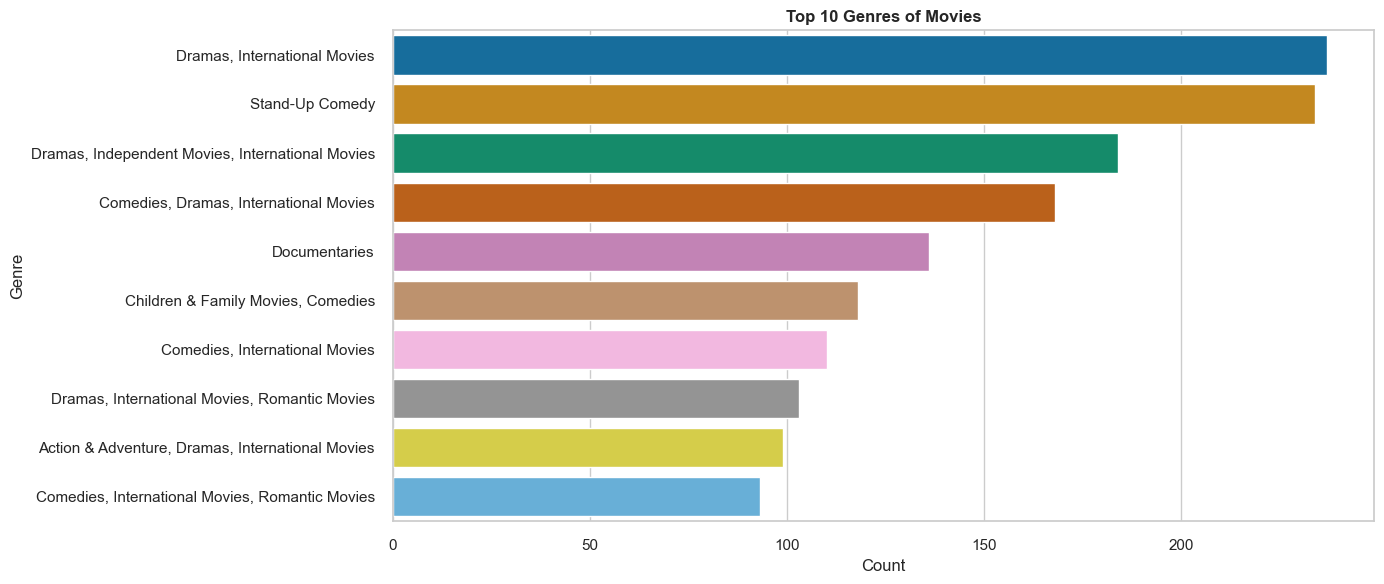

In [145]:
#Plotting Top 10 Genres of Movies
plt.figure(figsize=(14, 6))
plt.title('Top 10 Genres of Movies', fontweight="bold")
sns.countplot(y=merged_df[merged_df['type'] == 'Movie']['listed_in'], 
              order=merged_df[merged_df['type'] == 'Movie']['listed_in'].value_counts().index[:10],palette='colorblind')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

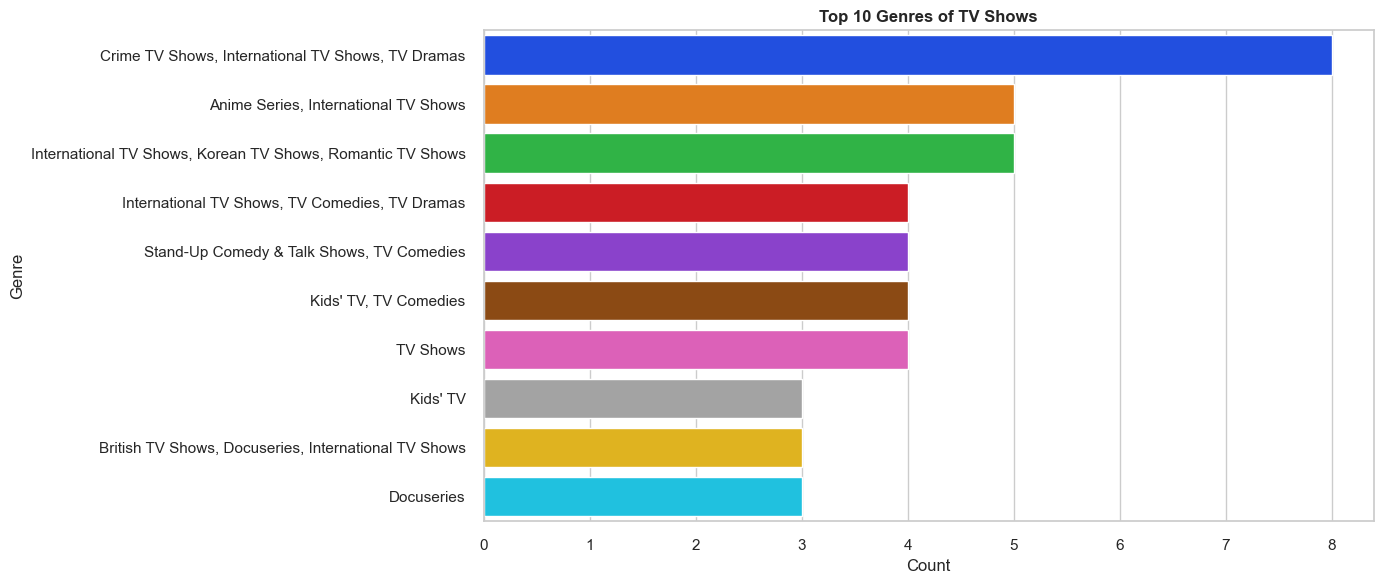

In [146]:
#plotting Top 10 Genres of TV Shows
plt.figure(figsize=(14, 6))
plt.title('Top 10 Genres of TV Shows', fontweight="bold")
sns.countplot(y=merged_df[merged_df['type'] == 'TV Show']['listed_in'], 
              order=merged_df[merged_df['type'] == 'TV Show']['listed_in'].value_counts().index[:10],palette='bright')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

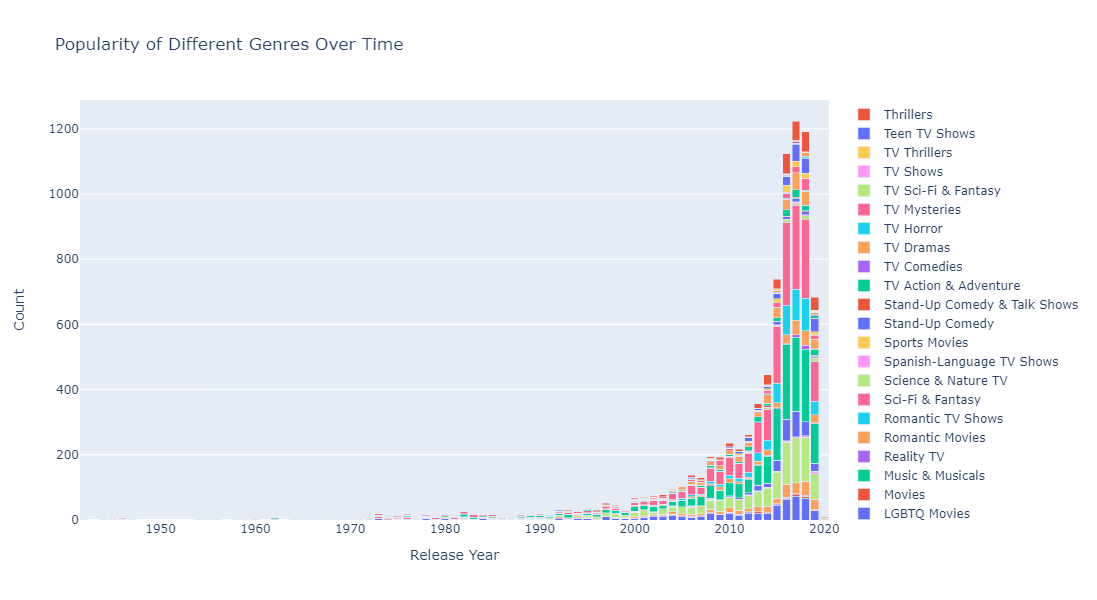

In [147]:
# Plotting Popularity of Different Genres Over Time
genre_year_df = merged_df[['listed_in', 'release_year']]
genre_year_df['listed_in'] = genre_year_df['listed_in'].apply(lambda x: x.split(', '))
genre_year_df = genre_year_df.explode('listed_in')
# Counting the occurrences of each genre for each year
genre_year_count = genre_year_df.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)
# Create traces for each genre
traces = []
for genre in genre_year_count.columns:
    trace = go.Bar(x=genre_year_count.index, y=genre_year_count[genre], name=genre)
    traces.append(trace)

# Layout of the plot
layout = go.Layout(title='Popularity of Different Genres Over Time',xaxis=dict(title='Release Year'),yaxis=dict(title='Count'),
                   barmode='stack',width=1000, height=600)
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [148]:
merged_df['date_added'] = pd.to_datetime(merged_df['date_added'])
merged_df['year_added'] = merged_df['date_added'].dt.year

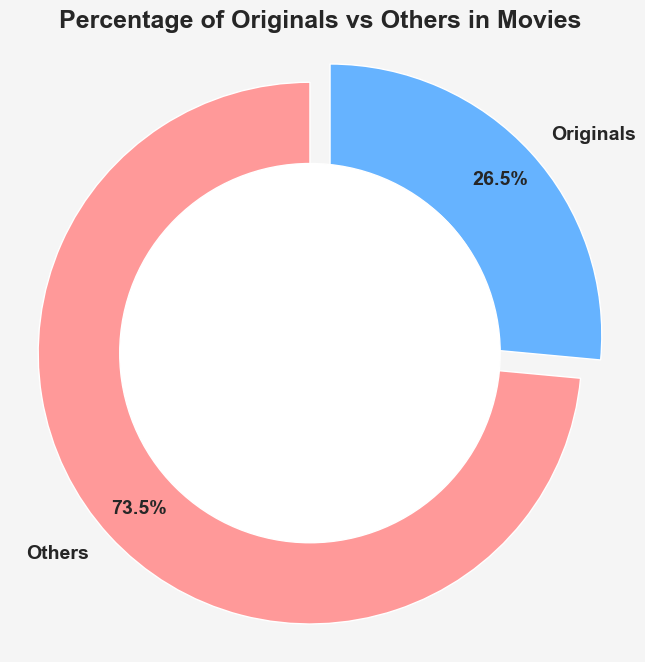

In [149]:
#PLotting Percentage of Originals vs Others in Movies
# Calculating whether each movie is an original or not
merged_df['originals'] = np.where(merged_df['release_year'] == merged_df['year_added'], 'Originals', 'Others')
fig, ax = plt.subplots(figsize=(8, 8), facecolor="#f5f5f5")  
ax.patch.set_facecolor('#f5f5f5')
explode = (0, 0.1)
counts = merged_df['originals'].value_counts()
labels = counts.index.tolist()
colors = ['#ff9999', '#66b3ff']  

ax.pie(counts, explode=explode, autopct='%1.1f%%', labels=labels,
       colors=colors, startangle=90, pctdistance=0.85,
       wedgeprops=dict(width=0.4), textprops={'fontsize': 14, 'fontweight': 'bold'})

# Drawing a circle in the center of the pie to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Percentage of Originals vs Others in Movies', fontsize=18, fontweight='bold')
plt.show()

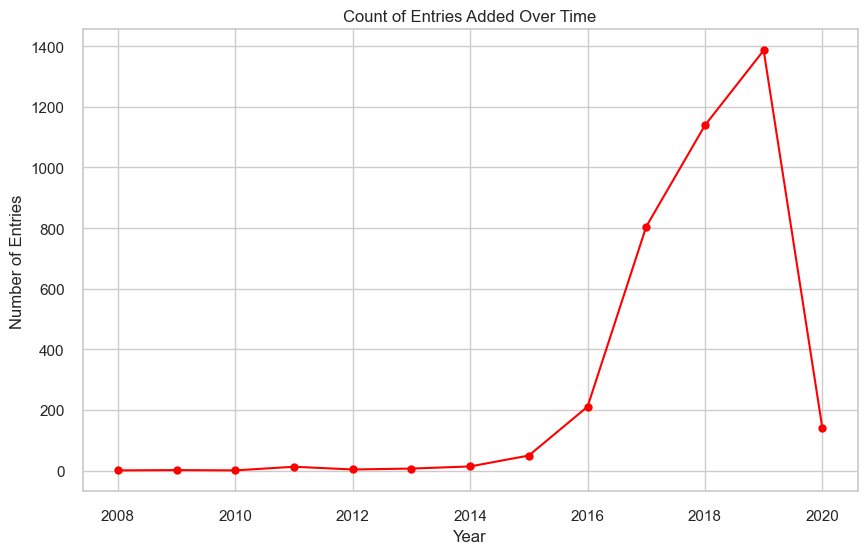

In [150]:
#PLotting the count of entries (movies or TV shows) added over time
entries_by_year = merged_df.groupby('year_added').size()
plt.figure(figsize=(10, 6))
plt.plot(entries_by_year.index, entries_by_year.values, marker='o', linestyle='-', color='red')
plt.title('Count of Entries Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Top 10 directors')

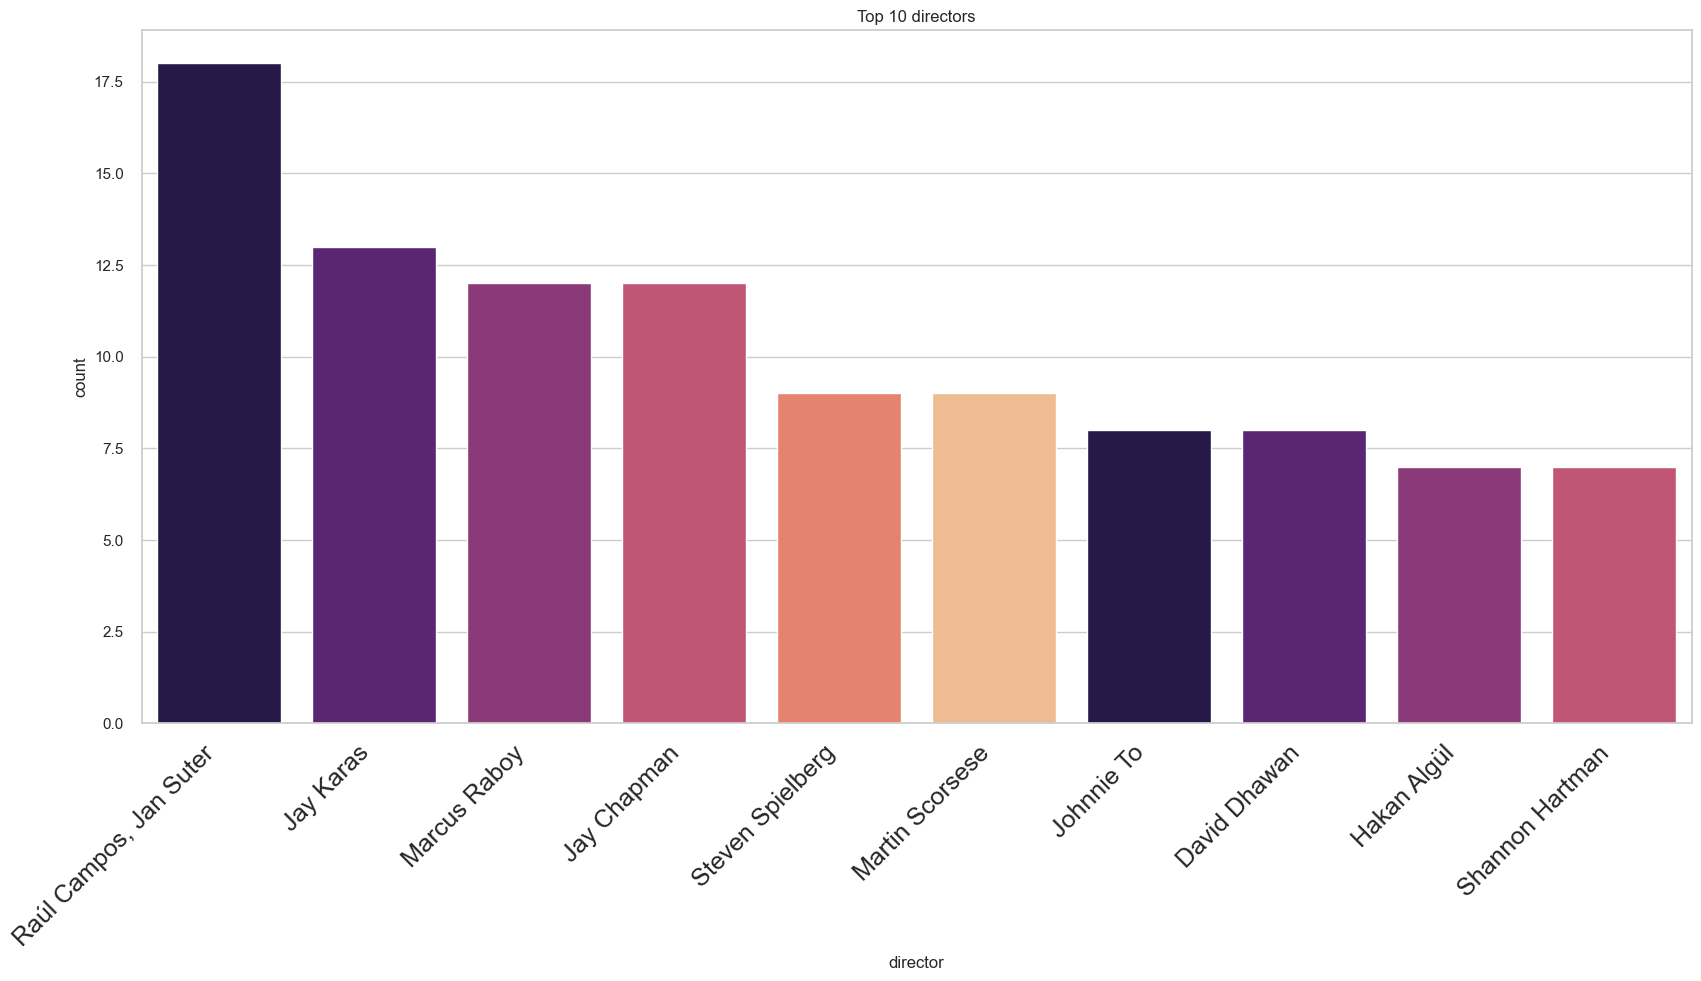

In [151]:
#Top 10 Most Prolific Directors
custom_palette = sns.color_palette('magma')
plt.figure(figsize=(20,9))
sns.countplot(x='director', data=merged_df, order=merged_df['director'].value_counts().index[:10],palette=custom_palette)
plt.xticks(rotation=45, ha='right',fontsize=18)
plt.title('Top 10 directors')

Text(0.5, 1.0, 'Top 10 Most Frequently Appearing Actors/Actresses')

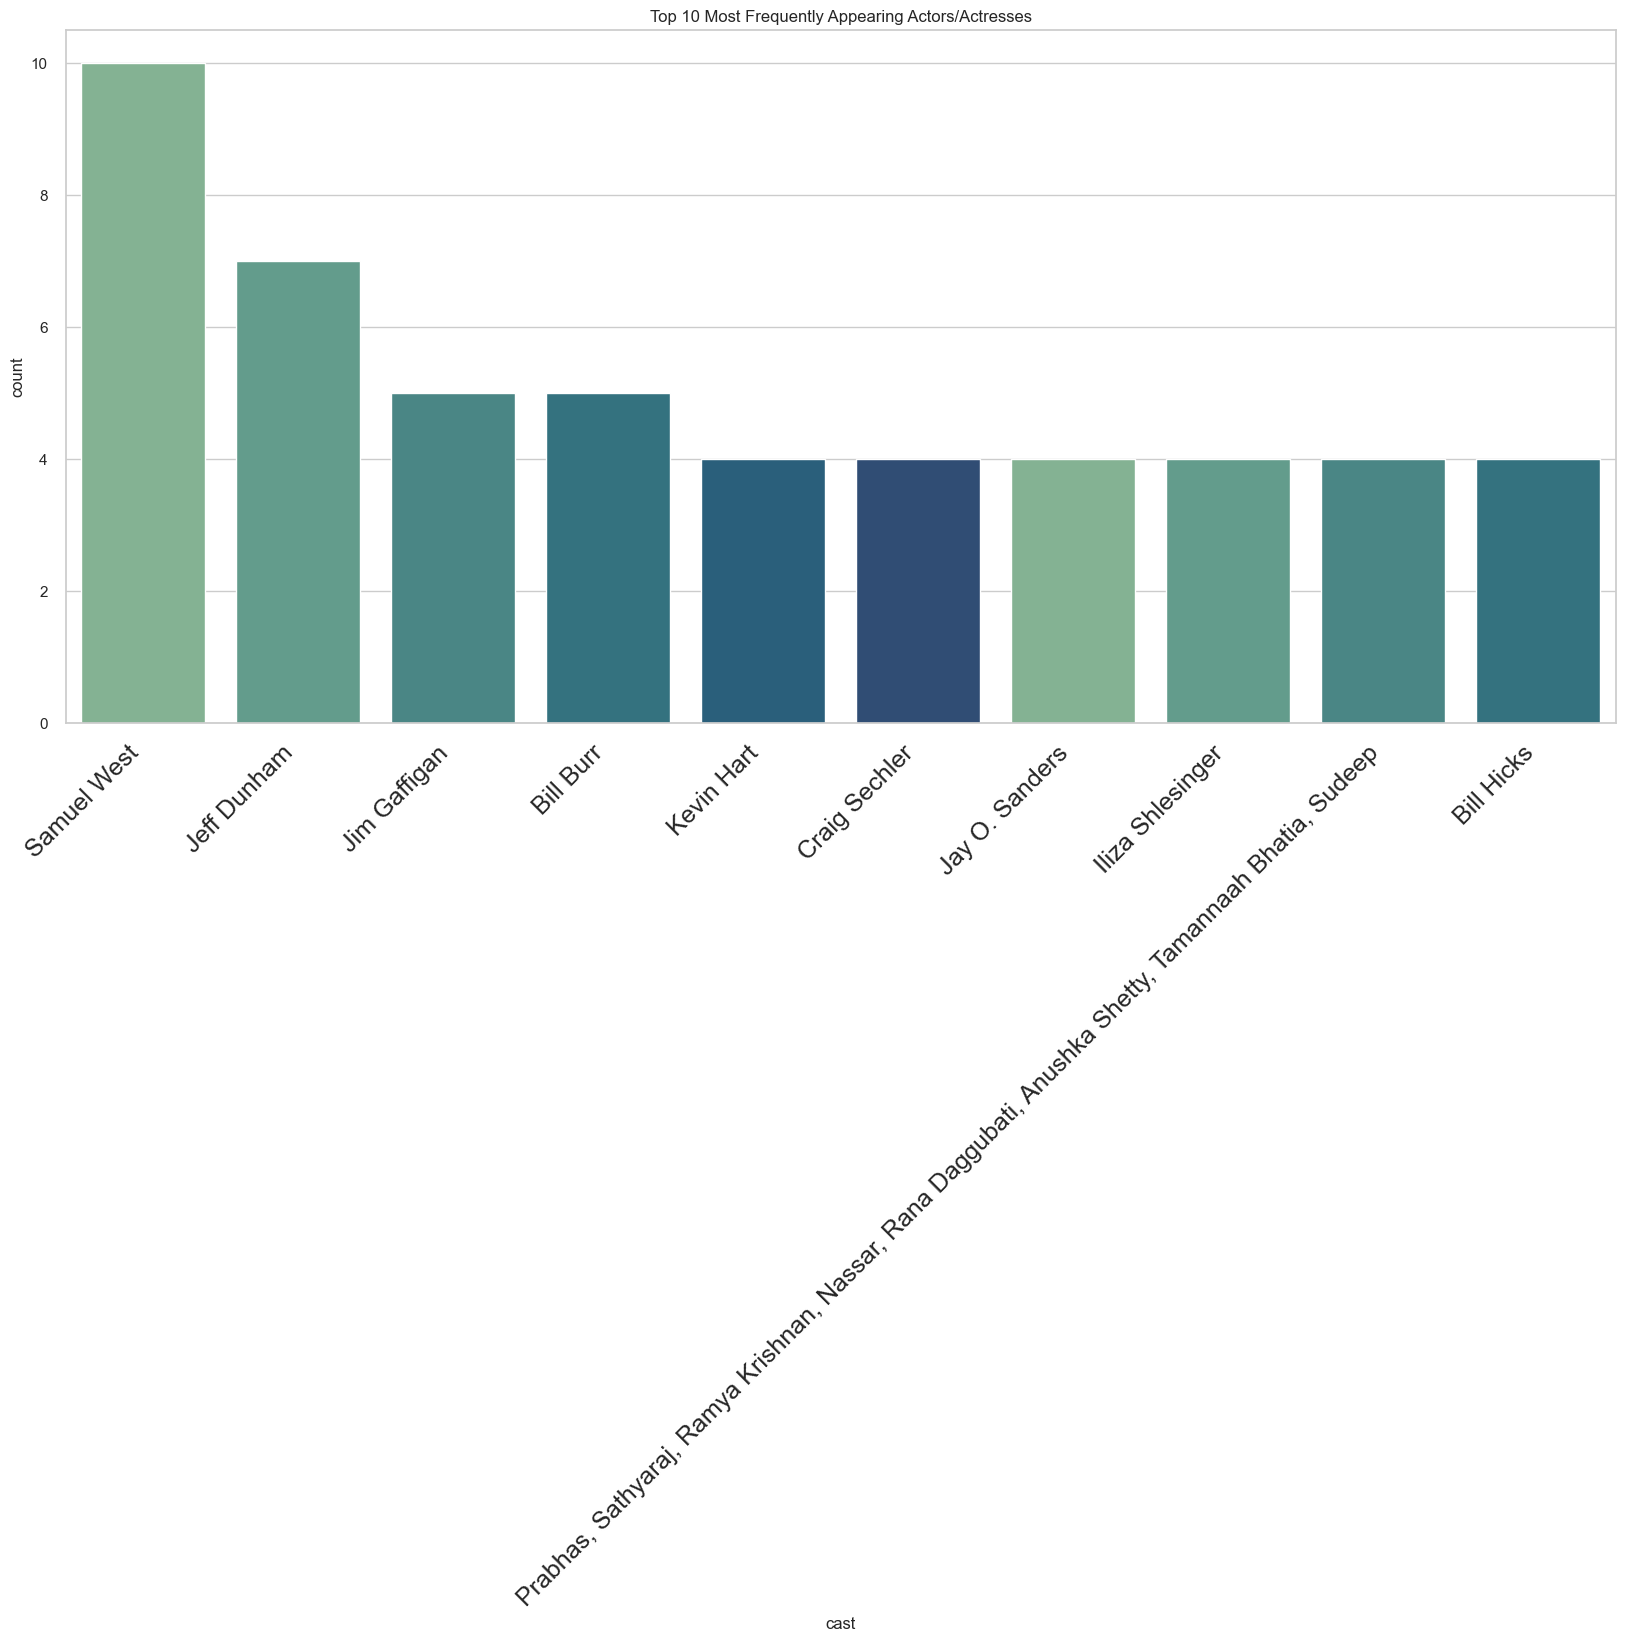

In [152]:
#Plotting Top 10 Most Frequently Appearing Actors/Actresses'
custom_palette = sns.color_palette("crest")
plt.figure(figsize=(20,9))
sns.countplot(x='cast', data=merged_df, order=merged_df['cast'].value_counts().index[:10],palette=custom_palette)
plt.xticks(rotation=45, ha='right',fontsize=18)
plt.title('Top 10 Most Frequently Appearing Actors/Actresses')

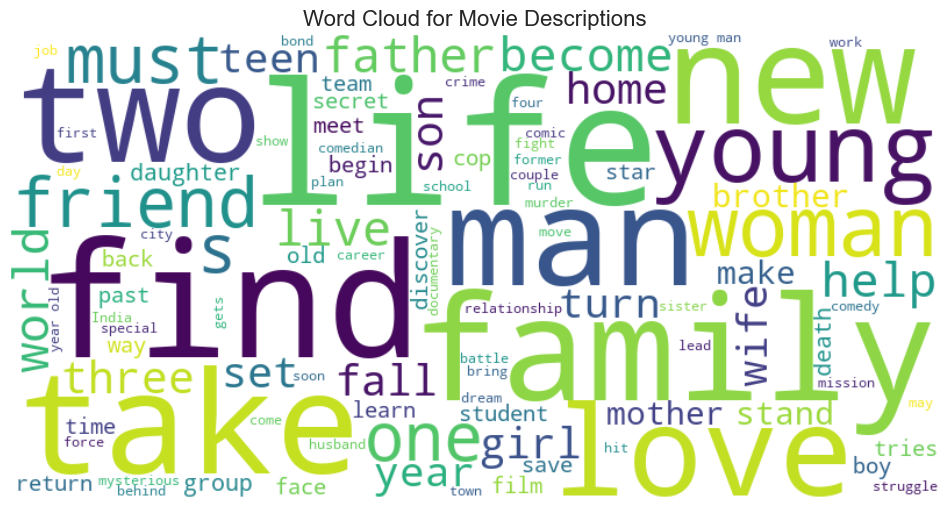

In [153]:
# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=100, contour_width=3,
                      contour_color='steelblue').generate(' '.join(merged_df['description']))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Movie Descriptions', fontsize=16)
plt.axis('off')
plt.show()

In [154]:
merged_df

,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_range,year_added,originals
0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies",2015-2019,2019,Originals
4,Movie,#realityhigh,2017-09-08,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies,2015-2019,2017,Originals
6,Movie,Automata,2017-09-08,2014,R,"In a dystopian future, an insurance adjuster f...",70304989,Gabe Ibáñez,"Bulgaria, Canada, United States, Spain","Antonio Banderas, Robert Forster, Tim McInnern...","International Movies, Sci-Fi & Fantasy, Thrillers",2010-2014,2017,Others
7,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017,TV-MA,Fabrizio Copano takes audience participation t...,80164077,"Rodrigo Toro, Francisco Schultz",Chile,Fabrizio Copano,Stand-Up Comedy,2015-2019,2017,Originals
9,Movie,Good People,2017-09-08,2014,R,A struggling couple can't believe their luck w...,70304990,Henrik Ruben Genz,"United States, Sweden, United Kingdom, Denmark","James Franco, Sam Spruell, Thomas Arnold, Anna...","Action & Adventure, Thrillers",2010-2014,2017,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144,TV Show,The Great British Baking Show,2019-08-30,2019,TV-PG,A talented batch of amateur bakers face off in...,80063224,Andy Devonshire,United Kingdom,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV",2015-2019,2019,Originals
6160,TV Show,Miraculous: Tales of Ladybug & Cat Noir,2019-08-02,2018,TV-Y7,"When Paris is in peril, Marinette becomes Lady...",80164216,Thomas Astruc,"France, South Korea, Japan","Cristina Vee, Max Mittelman, Stephanie Sheh, C...","Kids' TV, TV Action & Adventure",2015-2019,2019,Others
6169,TV Show,Sacred Games,2019-08-15,2019,TV-MA,A link in their pasts leads an honest cop to a...,80115328,"Vikramaditya Motwane, Anurag Kashyap","India, United States","Saif Ali Khan, Jitendra Joshi, Nawazuddin Sidd...","Crime TV Shows, International TV Shows, TV Dramas",2015-2019,2019,Originals
6184,TV Show,Men on a Mission,2019-04-09,2019,TV-14,Male celebs play make-believe as high schooler...,80176842,Jung-ah Im,South Korea,"Ho-dong Kang, Jang-hoon Seo, Kyung-hoon Min, H...","International TV Shows, Korean TV Shows, Stand...",2015-2019,2019,Originals


## Creating a Subset DataFrame with text coloums for Model Building

In [155]:
# Creating new feature content_detail with the help of other textual attributes
merged_df["content_detail"]= merged_df["cast"]+" "+merged_df["director"]+" "+merged_df["listed_in"]+" "+merged_df["type"]+" "+merged_df["country"]+" "+merged_df["description"]

#checking the manipulation
merged_df.head(5)

,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_range,year_added,originals,content_detail
0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies",2015-2019,2019,Originals,"Alan Marriott, Jennifer Cameron, Lee Tockar, J..."
4,Movie,#realityhigh,2017-09-08,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies,2015-2019,2017,Originals,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel..."
6,Movie,Automata,2017-09-08,2014,R,"In a dystopian future, an insurance adjuster f...",70304989,Gabe Ibáñez,"Bulgaria, Canada, United States, Spain","Antonio Banderas, Robert Forster, Tim McInnern...","International Movies, Sci-Fi & Fantasy, Thrillers",2010-2014,2017,Others,"Antonio Banderas, Robert Forster, Tim McInnern..."
7,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017,TV-MA,Fabrizio Copano takes audience participation t...,80164077,"Rodrigo Toro, Francisco Schultz",Chile,Fabrizio Copano,Stand-Up Comedy,2015-2019,2017,Originals,"Fabrizio Copano Rodrigo Toro, Francisco Schult..."
9,Movie,Good People,2017-09-08,2014,R,A struggling couple can't believe their luck w...,70304990,Henrik Ruben Genz,"United States, Sweden, United Kingdom, Denmark","James Franco, Sam Spruell, Thomas Arnold, Anna...","Action & Adventure, Thrillers",2010-2014,2017,Others,"James Franco, Sam Spruell, Thomas Arnold, Anna..."


In [156]:
merged_df= merged_df.reset_index()
merged_df = merged_df.drop('index', axis=1)
merged_df.rename(columns={'level_0': 'index'}, inplace=True)
merged_df

,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_range,year_added,originals,content_detail
0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies",2015-2019,2019,Originals,"Alan Marriott, Jennifer Cameron, Lee Tockar, J..."
1,Movie,#realityhigh,2017-09-08,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies,2015-2019,2017,Originals,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel..."
2,Movie,Automata,2017-09-08,2014,R,"In a dystopian future, an insurance adjuster f...",70304989,Gabe Ibáñez,"Bulgaria, Canada, United States, Spain","Antonio Banderas, Robert Forster, Tim McInnern...","International Movies, Sci-Fi & Fantasy, Thrillers",2010-2014,2017,Others,"Antonio Banderas, Robert Forster, Tim McInnern..."
3,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017,TV-MA,Fabrizio Copano takes audience participation t...,80164077,"Rodrigo Toro, Francisco Schultz",Chile,Fabrizio Copano,Stand-Up Comedy,2015-2019,2017,Originals,"Fabrizio Copano Rodrigo Toro, Francisco Schult..."
4,Movie,Good People,2017-09-08,2014,R,A struggling couple can't believe their luck w...,70304990,Henrik Ruben Genz,"United States, Sweden, United Kingdom, Denmark","James Franco, Sam Spruell, Thomas Arnold, Anna...","Action & Adventure, Thrillers",2010-2014,2017,Others,"James Franco, Sam Spruell, Thomas Arnold, Anna..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,TV Show,The Great British Baking Show,2019-08-30,2019,TV-PG,A talented batch of amateur bakers face off in...,80063224,Andy Devonshire,United Kingdom,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV",2015-2019,2019,Originals,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho..."
3769,TV Show,Miraculous: Tales of Ladybug & Cat Noir,2019-08-02,2018,TV-Y7,"When Paris is in peril, Marinette becomes Lady...",80164216,Thomas Astruc,"France, South Korea, Japan","Cristina Vee, Max Mittelman, Stephanie Sheh, C...","Kids' TV, TV Action & Adventure",2015-2019,2019,Others,"Cristina Vee, Max Mittelman, Stephanie Sheh, C..."
3770,TV Show,Sacred Games,2019-08-15,2019,TV-MA,A link in their pasts leads an honest cop to a...,80115328,"Vikramaditya Motwane, Anurag Kashyap","India, United States","Saif Ali Khan, Jitendra Joshi, Nawazuddin Sidd...","Crime TV Shows, International TV Shows, TV Dramas",2015-2019,2019,Originals,"Saif Ali Khan, Jitendra Joshi, Nawazuddin Sidd..."
3771,TV Show,Men on a Mission,2019-04-09,2019,TV-14,Male celebs play make-believe as high schooler...,80176842,Jung-ah Im,South Korea,"Ho-dong Kang, Jang-hoon Seo, Kyung-hoon Min, H...","International TV Shows, Korean TV Shows, Stand...",2015-2019,2019,Originals,"Ho-dong Kang, Jang-hoon Seo, Kyung-hoon Min, H..."


In [157]:
merged_df["content_detail"].astype(str)

0       Alan Marriott, Jennifer Cameron, Lee Tockar, J...
1       Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...
2       Antonio Banderas, Robert Forster, Tim McInnern...
3       Fabrizio Copano Rodrigo Toro, Francisco Schult...
4       James Franco, Sam Spruell, Thomas Arnold, Anna...
                              ...                        
3768    Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
3769    Cristina Vee, Max Mittelman, Stephanie Sheh, C...
3770    Saif Ali Khan, Jitendra Joshi, Nawazuddin Sidd...
3771    Ho-dong Kang, Jang-hoon Seo, Kyung-hoon Min, H...
3772    Ali Atay, Cengiz Bozkurt, Köksal Engür, Osman ...
Name: content_detail, Length: 3773, dtype: object

In [158]:
merged_df["content_detail"][0]

'Alan Marriott, Jennifer Cameron, Lee Tockar, Jonathan Holmes, Michael Dobson, Andrew Toth, Brian Dobson, Cole Howard, Lisa Durupt, Maya Kay Richard Finn, Tim Maltby Children & Family Movies, Comedies Movie United States, China, India, South Korea Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.'

In [159]:
# after above all the changes, those features are in list format, so making list of description feature
merged_df["content_detail"] = merged_df["content_detail"].apply(lambda x: x.split(' '))
# converting text feature to string from list
merged_df["content_detail"]= merged_df["content_detail"].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
merged_df["content_detail"]= merged_df["content_detail"].apply(lambda x: x.lower())

# Remove punctuations and brackets
merged_df["content_detail"] = merged_df["content_detail"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [160]:
merged_df["content_detail"][0]

'alan marriott jennifer cameron lee tockar jonathan holmes michael dobson andrew toth brian dobson cole howard lisa durupt maya kay richard finn tim maltby children  family movies comedies movie united states china india south korea before planning an awesome wedding for his grandfather a polar bear king must take back a stolen artifact from an evil archaeologist first'

In [161]:
english_stopwords = stopwords.words('english')
print(english_stopwords)

def remove_stopwords(text):
    text = [word for word in text.split() if word not in english_stopwords]
    return " ".join(text)
merged_df["content_detail"] = merged_df["content_detail"].apply(remove_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [162]:
# Check the result
merged_df["content_detail"][0]

'alan marriott jennifer cameron lee tockar jonathan holmes michael dobson andrew toth brian dobson cole howard lisa durupt maya kay richard finn tim maltby children family movies comedies movie united states china india south korea planning awesome wedding grandfather polar bear king must take back stolen artifact evil archaeologist first'

In [163]:
nltk.download('punkt')

# Tokenization
merged_df["content_detail"] = merged_df["content_detail"] .apply(nltk.word_tokenize)

# Checking the observation after manipulation
merged_df.iloc[0,]['content_detail']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['alan',
 'marriott',
 'jennifer',
 'cameron',
 'lee',
 'tockar',
 'jonathan',
 'holmes',
 'michael',
 'dobson',
 'andrew',
 'toth',
 'brian',
 'dobson',
 'cole',
 'howard',
 'lisa',
 'durupt',
 'maya',
 'kay',
 'richard',
 'finn',
 'tim',
 'maltby',
 'children',
 'family',
 'movies',
 'comedies',
 'movie',
 'united',
 'states',
 'china',
 'india',
 'south',
 'korea',
 'planning',
 'awesome',
 'wedding',
 'grandfather',
 'polar',
 'bear',
 'king',
 'must',
 'take',
 'back',
 'stolen',
 'artifact',
 'evil',
 'archaeologist',
 'first']

In [164]:
def lemmatizing_sentence(text):
    text = [wordnet.lemmatize(word) for word in text]
    text=  " ".join(text)
    return text

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

merged_df["content_detail"]= merged_df["content_detail"].apply(lemmatizing_sentence)
merged_df.iloc[0,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'alan marriott jennifer cameron lee tockar jonathan holmes michael dobson andrew toth brian dobson cole howard lisa durupt maya kay richard finn tim maltby child family movie comedy movie united state china india south korea planning awesome wedding grandfather polar bear king must take back stolen artifact evil archaeologist first'

In [165]:
merged_df["content_detail"][0]

'alan marriott jennifer cameron lee tockar jonathan holmes michael dobson andrew toth brian dobson cole howard lisa durupt maya kay richard finn tim maltby child family movie comedy movie united state china india south korea planning awesome wedding grandfather polar bear king must take back stolen artifact evil archaeologist first'

In [166]:
merged_df

,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_range,year_added,originals,content_detail
0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies",2015-2019,2019,Originals,alan marriott jennifer cameron lee tockar jona...
1,Movie,#realityhigh,2017-09-08,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies,2015-2019,2017,Originals,nesta cooper alicia sanz kid ink jake borelli ...
2,Movie,Automata,2017-09-08,2014,R,"In a dystopian future, an insurance adjuster f...",70304989,Gabe Ibáñez,"Bulgaria, Canada, United States, Spain","Antonio Banderas, Robert Forster, Tim McInnern...","International Movies, Sci-Fi & Fantasy, Thrillers",2010-2014,2017,Others,antonio banderas robert forster tim mcinnerny ...
3,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017,TV-MA,Fabrizio Copano takes audience participation t...,80164077,"Rodrigo Toro, Francisco Schultz",Chile,Fabrizio Copano,Stand-Up Comedy,2015-2019,2017,Originals,fabrizio copano rodrigo toro francisco schultz...
4,Movie,Good People,2017-09-08,2014,R,A struggling couple can't believe their luck w...,70304990,Henrik Ruben Genz,"United States, Sweden, United Kingdom, Denmark","James Franco, Sam Spruell, Thomas Arnold, Anna...","Action & Adventure, Thrillers",2010-2014,2017,Others,james franco sam spruell thomas arnold anna fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,TV Show,The Great British Baking Show,2019-08-30,2019,TV-PG,A talented batch of amateur bakers face off in...,80063224,Andy Devonshire,United Kingdom,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV",2015-2019,2019,Originals,mel giedroyc sue perkins mary berry paul holly...
3769,TV Show,Miraculous: Tales of Ladybug & Cat Noir,2019-08-02,2018,TV-Y7,"When Paris is in peril, Marinette becomes Lady...",80164216,Thomas Astruc,"France, South Korea, Japan","Cristina Vee, Max Mittelman, Stephanie Sheh, C...","Kids' TV, TV Action & Adventure",2015-2019,2019,Others,cristina vee max mittelman stephanie sheh carr...
3770,TV Show,Sacred Games,2019-08-15,2019,TV-MA,A link in their pasts leads an honest cop to a...,80115328,"Vikramaditya Motwane, Anurag Kashyap","India, United States","Saif Ali Khan, Jitendra Joshi, Nawazuddin Sidd...","Crime TV Shows, International TV Shows, TV Dramas",2015-2019,2019,Originals,saif ali khan jitendra joshi nawazuddin siddiq...
3771,TV Show,Men on a Mission,2019-04-09,2019,TV-14,Male celebs play make-believe as high schooler...,80176842,Jung-ah Im,South Korea,"Ho-dong Kang, Jang-hoon Seo, Kyung-hoon Min, H...","International TV Shows, Korean TV Shows, Stand...",2015-2019,2019,Originals,hodong kang janghoon seo kyunghoon min heechul...


In [167]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(merged_df["content_detail"])
X_tfidf.shape

(3773, 5000)

In [168]:
# convert X into array form for clustering
X = X_tfidf.toarray() 
qfidf_df = pd.DataFrame(X)
qfidf_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# K-means


In [169]:
model=KMeans(n_clusters=30)
model.fit_predict(qfidf_df)

array([ 5,  9, 15, ..., 24, 24, 24])

In [170]:
#Elbow method for evaluation
nc=range(2,31)
l=[]
for i in nc:

    model=KMeans(n_clusters=i)
    model.fit(qfidf_df)
    l.append(model.inertia_)

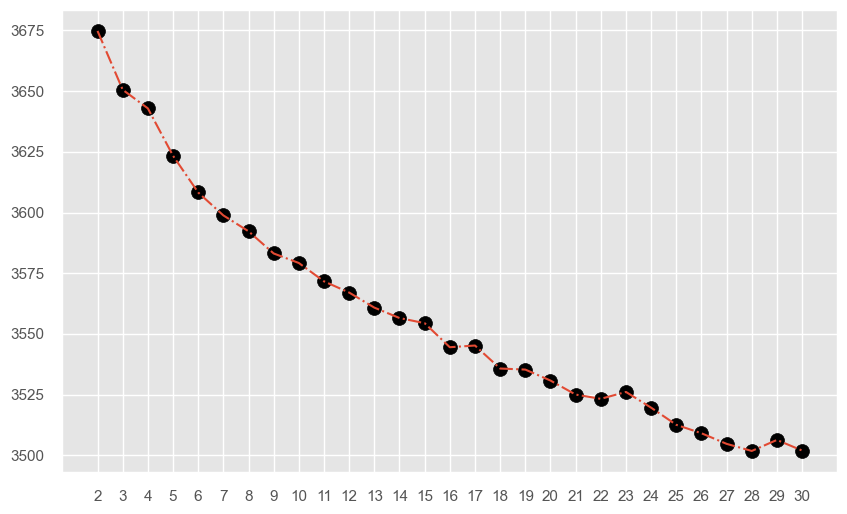

In [171]:
#Plotting Elbow Curve
plt.figure(figsize=(10, 6))
plt.style.use('ggplot') 
plt.scatter(nc, l, s=100, color="black")
plt.plot(nc, l, linestyle="-.")
plt.xticks(nc)
plt.show()

In [172]:
#Silhouette Score for K-means
nc=range(2,31)
l=[]
for i in nc:

    model=KMeans(n_clusters=i)
    model.fit(qfidf_df)
    l.append(silhouette_score(qfidf_df,model.fit_predict(qfidf_df)))

<function matplotlib.pyplot.show(close=None, block=None)>

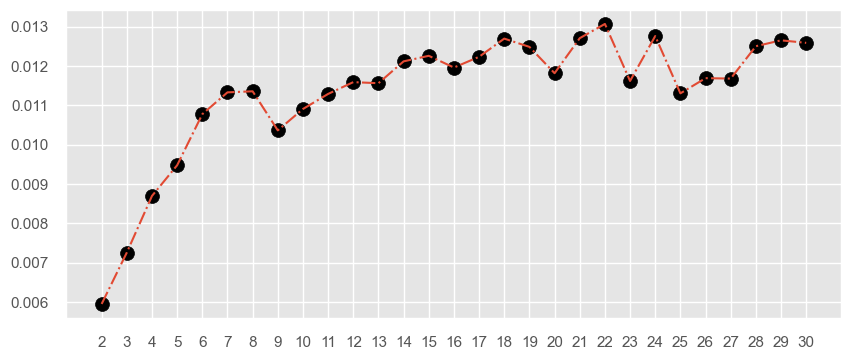

In [173]:
#Plotting Silhouette Score for K-Means 
plt.figure(figsize=(10,4))
plt.style.use('ggplot')
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show

In [174]:
k_range = range(2, 31)
for k in k_range:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(qfidf_df) 
    score = silhouette_score(qfidf_df, labels)
    print("k=%d, Silhouette score=%f" % (k, score))



k=2, Silhouette score=0.005956
k=3, Silhouette score=0.008010
k=4, Silhouette score=0.008709
k=5, Silhouette score=0.009568
k=6, Silhouette score=0.010782
k=7, Silhouette score=0.011442
k=8, Silhouette score=0.011141
k=9, Silhouette score=0.011895
k=10, Silhouette score=0.010428
k=11, Silhouette score=0.011084
k=12, Silhouette score=0.011513
k=13, Silhouette score=0.011463
k=14, Silhouette score=0.012207
k=15, Silhouette score=0.011886
k=16, Silhouette score=0.010563
k=17, Silhouette score=0.011649
k=18, Silhouette score=0.010804
k=19, Silhouette score=0.011194
k=20, Silhouette score=0.012908
k=21, Silhouette score=0.012108
k=22, Silhouette score=0.012613
k=23, Silhouette score=0.012534
k=24, Silhouette score=0.012761
k=25, Silhouette score=0.012361
k=26, Silhouette score=0.012807
k=27, Silhouette score=0.012842
k=28, Silhouette score=0.011878
k=29, Silhouette score=0.012509
k=30, Silhouette score=0.012764


# HIERARCHICAL CLUSTERING

In [175]:
model2=AgglomerativeClustering(n_clusters=30,affinity="l2",linkage="complete")
model2.fit_predict(qfidf_df)

array([ 0, 18,  0, ..., 23, 23, 23], dtype=int64)

In [176]:
#Silhouette Score for Hierarchial clustering
nc=range(2,31)
l=[]
for i in nc:

    model2=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage="complete")
    l.append(silhouette_score(qfidf_df,model2.fit_predict(qfidf_df)))

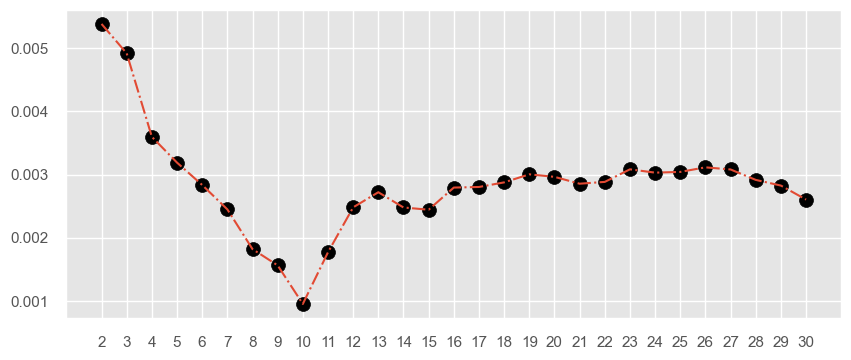

In [177]:
plt.figure(figsize=(10,4))
plt.style.use('ggplot')
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

In [178]:
k_range = range(2, 31)
for k in k_range:
    model2 = AgglomerativeClustering(n_clusters=k)
    labels = model2.fit_predict(qfidf_df)
    score = silhouette_score(qfidf_df, labels)
    print("k=%d, Silhouette score=%f" % (k, score))


k=2, Silhouette score=0.006238
k=3, Silhouette score=0.006375
k=4, Silhouette score=0.006728
k=5, Silhouette score=0.007376
k=6, Silhouette score=0.007837
k=7, Silhouette score=0.008368
k=8, Silhouette score=0.008070
k=9, Silhouette score=0.008583
k=10, Silhouette score=0.008371
k=11, Silhouette score=0.008748
k=12, Silhouette score=0.007910
k=13, Silhouette score=0.007613
k=14, Silhouette score=0.007924
k=15, Silhouette score=0.007324
k=16, Silhouette score=0.006953
k=17, Silhouette score=0.006867
k=18, Silhouette score=0.007057
k=19, Silhouette score=0.007307
k=20, Silhouette score=0.006472
k=21, Silhouette score=0.006771
k=22, Silhouette score=0.006816
k=23, Silhouette score=0.006759
k=24, Silhouette score=0.007033
k=25, Silhouette score=0.007255
k=26, Silhouette score=0.007104
k=27, Silhouette score=0.007186
k=28, Silhouette score=0.007468
k=29, Silhouette score=0.007395
k=30, Silhouette score=0.007170


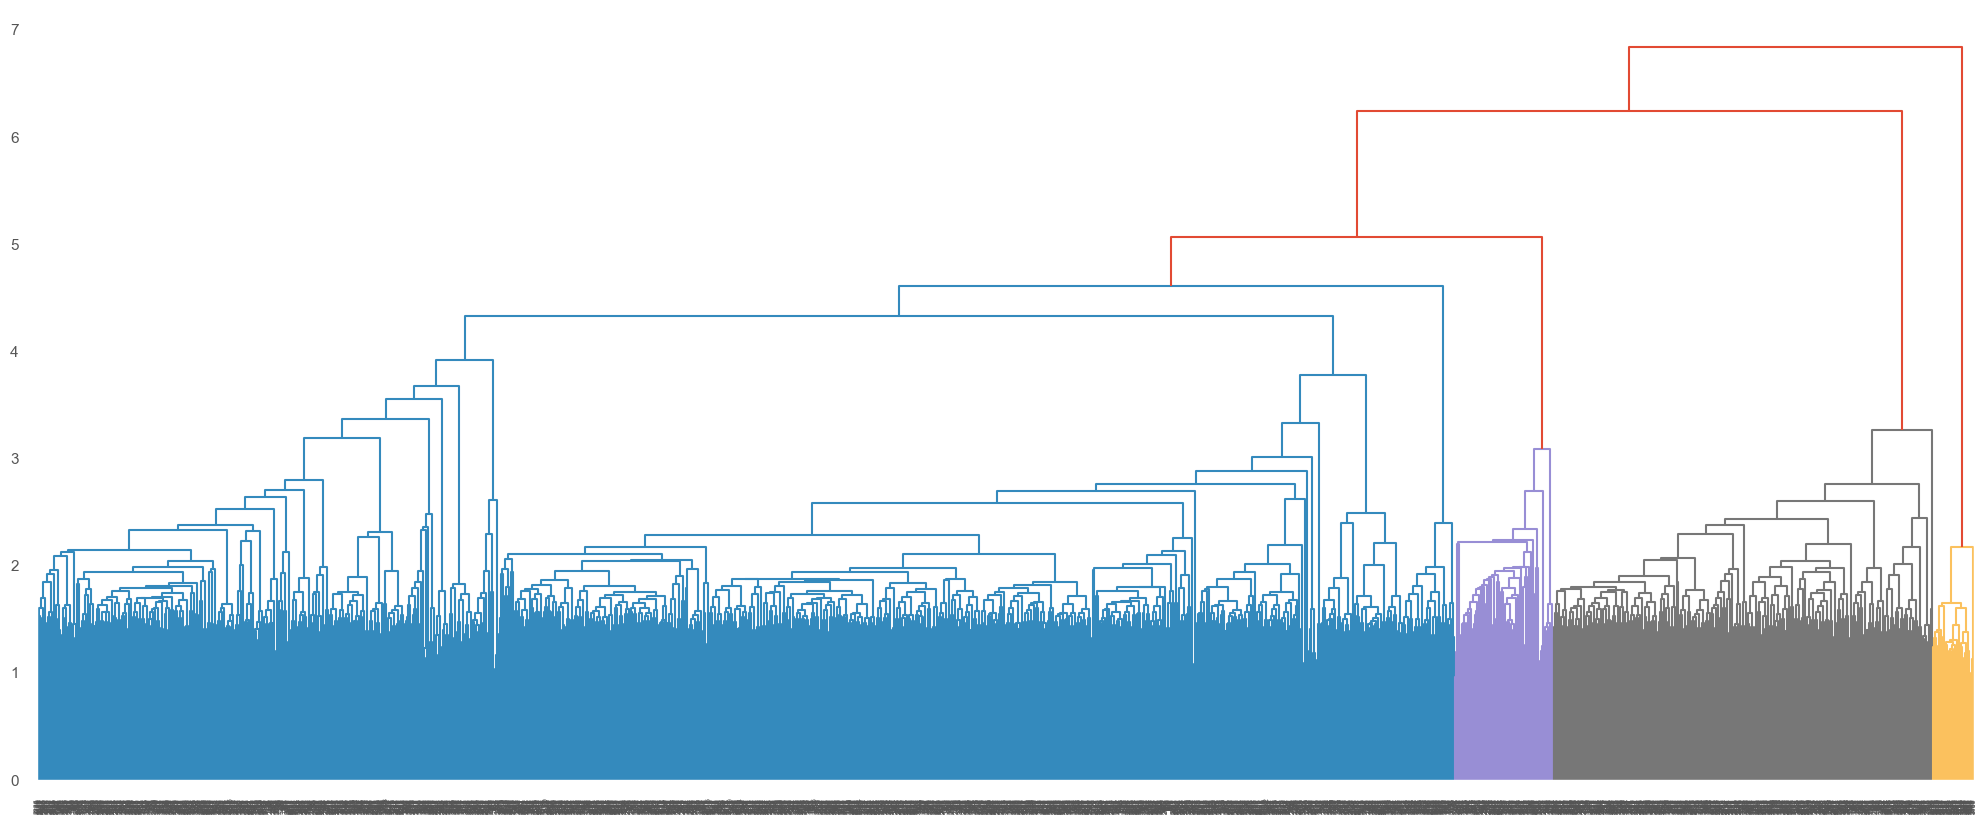

In [179]:
xdist=pdist(qfidf_df,metric="euclidean")
linked = linkage(xdist, 'ward')

plt.figure(figsize=(25, 10))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## Recommendation Function

In [180]:
qfidf_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
# Compute cosine similarity matrix
similarity = cosine_similarity(qfidf_df)
similarity = pd.DataFrame(similarity)
similarity

,0,1,2,3,4,5,6,7,8,9,...,3763,3764,3765,3766,3767,3768,3769,3770,3771,3772
0,1.000000,0.021219,0.032914,0.028552,0.021557,0.013698,0.007049,0.016584,0.008014,0.018470,...,0.016008,0.037804,0.000000,0.041775,0.070034,0.002633,0.050303,0.010015,0.077804,0.003908
1,0.021219,1.000000,0.007450,0.005208,0.043358,0.011512,0.003535,0.013449,0.006025,0.036837,...,0.016057,0.044377,0.000000,0.011905,0.003591,0.002641,0.073761,0.004731,0.023406,0.003920
2,0.032914,0.007450,1.000000,0.002121,0.021384,0.030821,0.007179,0.012593,0.056632,0.029426,...,0.005252,0.051629,0.002413,0.004953,0.002668,0.028947,0.009382,0.007271,0.002650,0.002913
3,0.028552,0.005208,0.002121,1.000000,0.001129,0.002436,0.003866,0.008112,0.006590,0.001996,...,0.037914,0.000000,0.000000,0.000000,0.029670,0.000000,0.000000,0.000000,0.029467,0.004287
4,0.021557,0.043358,0.021384,0.001129,1.000000,0.097815,0.003820,0.053777,0.037821,0.052352,...,0.015462,0.034263,0.000000,0.066814,0.000000,0.017275,0.029449,0.007500,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,0.002633,0.002641,0.028947,0.000000,0.017275,0.018644,0.000000,0.002935,0.000000,0.002524,...,0.195314,0.209418,0.145082,0.320236,0.271048,1.000000,0.153837,0.270865,0.269198,0.317172
3769,0.050303,0.073761,0.009382,0.000000,0.029449,0.042559,0.013729,0.048737,0.023903,0.039120,...,0.119011,0.195441,0.105171,0.194897,0.216507,0.153837,1.000000,0.175256,0.221699,0.206977
3770,0.010015,0.004731,0.007271,0.000000,0.007500,0.014096,0.026020,0.005259,0.002560,0.004521,...,0.232446,0.224931,0.171597,0.331705,0.321636,0.270865,0.175256,1.000000,0.319440,0.386677
3771,0.077804,0.023406,0.002650,0.029467,0.000000,0.003044,0.000000,0.003965,0.006509,0.000000,...,0.337774,0.208112,0.199588,0.335932,0.525584,0.269198,0.221699,0.319440,1.000000,0.380931


In [182]:
def recommend(movie):
    index = merged_df[merged_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]:
        print(merged_df.iloc[i[0]].title)


In [183]:
recommend('Rocky')

Rocky III
Rocky II
Rocky IV
Rocky V
Spy Kids 3: Game Over
The B-Side: Elsa Dorfman's Portrait Photography
Bill Burr: Paper Tiger
Tunisian Victory
The Bleeder
He Named Me Malala


In [184]:
recommend('Good People')

The Crow
The Salvation
Only God Forgives
The Titan
Spider-Man 3
Pusher
The Danish Girl
Luck by Chance
Dead in a Week (Or Your Money Back)
Kon-Tiki


In [185]:
recommend('Bhool Bhulaiyaa')

Bhagam Bhag
Ferrari Ki Sawaari
Billu
Bhouri
Chup Chup Ke
Ready
Humko Deewana Kar Gaye
Guru
Harishchandrachi Factory
Made in China


In [186]:
recommend('Force 2')

Mohenjo Daro
Sangam
Dagh Ujala
The Legend of Michael Mishra
Bobby
Game
Jaane Tu... Ya Jaane Na
Sei
Parmanu: The Story of Pokhran
Manto


In [187]:
import pickle

In [188]:
pickle.dump(merged_df,open('movies.pkl','wb'))
pickle.dump(merged_df.to_dict(),open('movies_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))